<a href="https://www.kaggle.com/code/innocentnovart/spam-messages-project?scriptVersionId=135301682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **ABOUT THE PROJECT:**

**Introduction:**

Spam Messages Classifier is a Natural Language Processing (NLP) project. NLP is a field of artificial intelligence which gives machines the ability to read, understand, and derive meaning from human languages. In python, NLP can be performed using the **Scikit Learn Library (sklearn)** as well as **Natural Language Toolkit Library (nltk)**. For spam messages, the machine is trained to read, to encode (vectoral representation of texts), to tokenize the encoded texts into bag of words, and thereafter identify whether or not a message is a ham (legitimate message) or a spam message.

**About NLP Preprocessing:**

NLP Text Analysis is a major application field for machine learning algorithms. However the raw data (a sequence of symbols) cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

Scikit-learn library provides utilities for the most common ways to extract numerical features such as:
* Tokenization

tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
* Vectorization

counting the occurrences of tokens in each document
* TF-IDF

normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.
* Bag of Words

This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

**About the Machine Learning Models used:**

For this project, the machine learning models used to classify the messages dataset as either ham or spam were K-Nearest Neighbors and Naive Bayes. These two were selected because of their potential in handling text-based datasets

* K-Nearest Neighbors (KNN)

KNN classifies a message by finding the K nearest neighbors from the labeled dataset and assigning a label based on majority voting. For example, if the majority of the nearest neighbors are labeled as spam, the new email will also be classified as spam. KNN is easy to implement, as it primarily relies on calculating distances between data points, and it can capture complex relationships in the data without assuming any specific distribution.
* Naive Bayes

Naive Bayes is a probabilistic classification algorithm that applies Bayes' theorem with an assumption of independence between features. In the context of spam classification, Naive Bayes treats each word or feature in a message as independent and calculates the probability of a message being spam or ham based on the presence or absence of certain words. It learns the conditional probabilities of words given the class (spam or ham) from a labeled training dataset. When a new message arrives, Naive Bayes calculates the probability of it belonging to each class and assigns the label with the highest probability.


# PYTHON LIBRARIES USED IN THE PROJECT:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

# READING THE DATASET "spam messages.csv"

In [2]:
data = pd.read_csv('/kaggle/input/spam-messages/spam messages.csv',encoding='latin-1')

# EDA (Exploratory Data Analysis):
## Data Cleaning, Handling Null Values, Feature Selection and Engineering, and Data Visualization.

In [3]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1) # dropping the "unnammed" features as they contain null values
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data = data.rename(columns={'v1':'label','v2':'text'}) # renaming features "v1" and "v2" to label and text
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [9]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
data['spam'] = data['label'].map({'spam':1, 'ham':0}).astype(int) # feature engineering for spam classification
data.head(10)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [11]:
data['length of message'] = data['text'].apply(len) # feature engineering by length of message
data.head(10)

,label,text,spam,length of message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


(-40.0, 950.0)

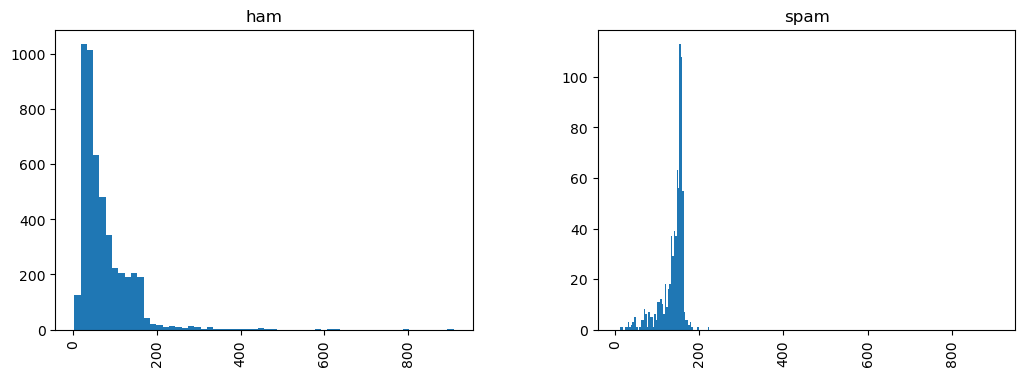

In [12]:
data.hist(column='length of message', by='label', bins=60, figsize=(12,4))
plt.xlim(-40,950)
# ham messages are positively skewed while spam messages are negatively skewed

In [13]:
spam = data[data['label']=='spam'].copy() # new dataframe "spam" with only spam messages
spam.head()

,label,text,spam,length of message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,136


In [14]:
ham = data[data['label']=='ham'].copy() # new dataframe "ham" with only ham messages
ham.head()

,label,text,spam,length of message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
6,ham,Even my brother is not like to speak with me. ...,0,77


In [15]:
# visualizing word cloud for all spam messages using wordcloud
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

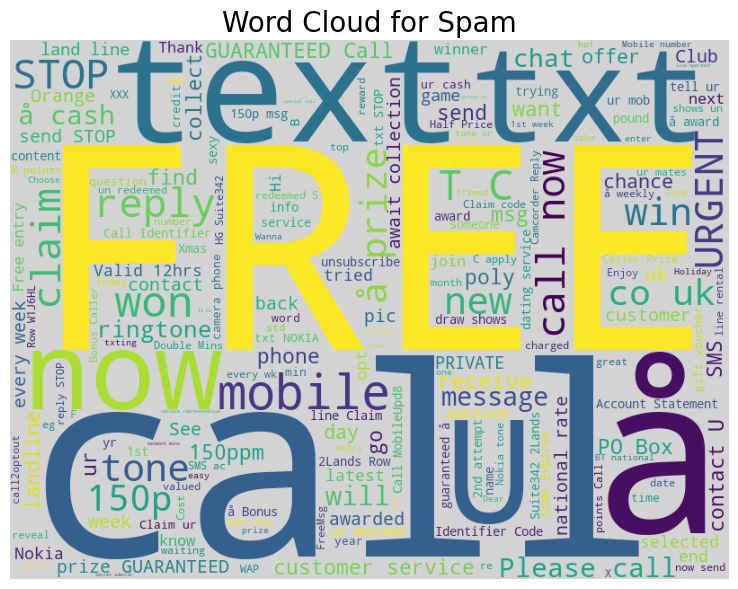

In [16]:
show_wordcloud(spam, "Word Cloud for Spam") # most spam messages contained the words "free" and "call"

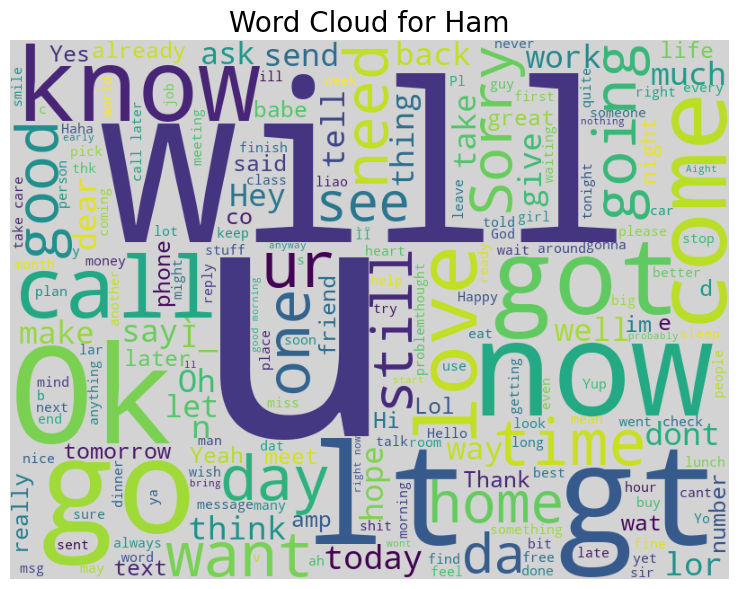

In [17]:
show_wordcloud(ham, "Word Cloud for Ham")

# PREPROCESSING THE DATA FOR NLP:
## Converting text to lowercase, Removing punctuation, Removing stopwords.

In [18]:
import string # working with punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
import nltk # working with the stopwords list from NLTK library for english language
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")[100:110]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

In [20]:
# defining a function to remove stopwords and punctuations
def remove_punctuation_and_stopwords(sms): 
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()

    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]

    return sms_no_punctuation_no_stopwords

In [21]:
# applying the defined function to the entire dataframe "data"
data['text'].apply(remove_punctuation_and_stopwords)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

**Creating a list of top 30 words from spam messages and ham messages after removing punctuations and stopwords:**

In [22]:
# first removing the punctuations and stopwords
spam.loc[:,'text'] = spam['text'].apply(remove_punctuation_and_stopwords)
ham.loc[:,'text'] = ham['text'].apply(remove_punctuation_and_stopwords)

In [23]:
# creating the list of 30 words for spam messages
spamlist = spam['text'].tolist()
spamlist

[['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['freemsg',
  'hey',
  'darling',
  '3',
  'weeks',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'å£150',
  'rcv'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
  'å£900',
  'prize',
  'reward',
  'claim',
  'call',
  '09061701461',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hours'],
 ['mobile',
  '11',
  'months',
  'u',
  'r',
  'entitled',
  'update',
  'latest',
  'colour',
  'mobiles',
  'camera',
  'free',
  'call',
  'mobile',
  'update',
  'co',
  'free',
  '08002986030'],
 ['six',
  'chances',
  'win',
  'cash',
  '100',
  '20000',
  'pounds',
  'txt',
  'csh11',
  'send',
  '87575',
  'cost',
  '150pday',
  '6days',

In [24]:
# creating the list of 30 words for spam messages
hamlist = ham['text'].tolist()
hamlist

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  'press',
  '9',
  'copy',
  'friends',
  'callertune'],
 ['im',
  'gonna',
  'home',
  'soon',
  'dont',
  'want',
  'talk',
  'stuff',
  'anymore',
  'tonight',
  'k',
  'ive',
  'cried',
  'enough',
  'today'],
 ['ive',
  'searching',
  'right',
  'words',
  'thank',
  'breather',
  'promise',
  'wont',
  'take',
  'help',
  'granted',
  'fulfil',
  'promise',
  'wonderful',
  'blessing',
  'times'],
 ['date', 'sunday'],
 ['oh', 'kim',

In [25]:
list_ham_words = []
for sublist in hamlist:
    for item in sublist:
        list_ham_words.append(item)

In [26]:
list_spam_words = []
for sublist in spamlist:
    for item in sublist:
        list_spam_words.append(item)

In [27]:
# creating words counter for visualization
from collections import Counter
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

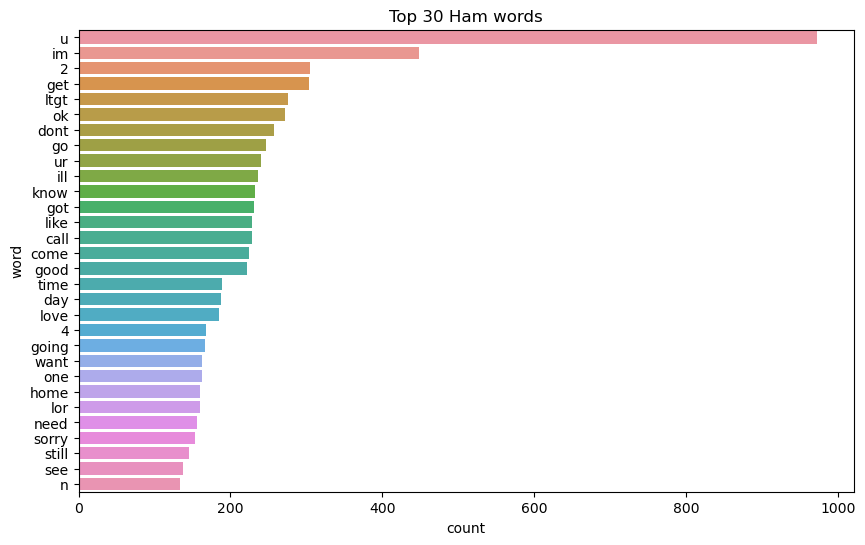

In [28]:
# visualizing the top 30 words list for ham messages
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='count', y='word', 
            data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='horizontal');

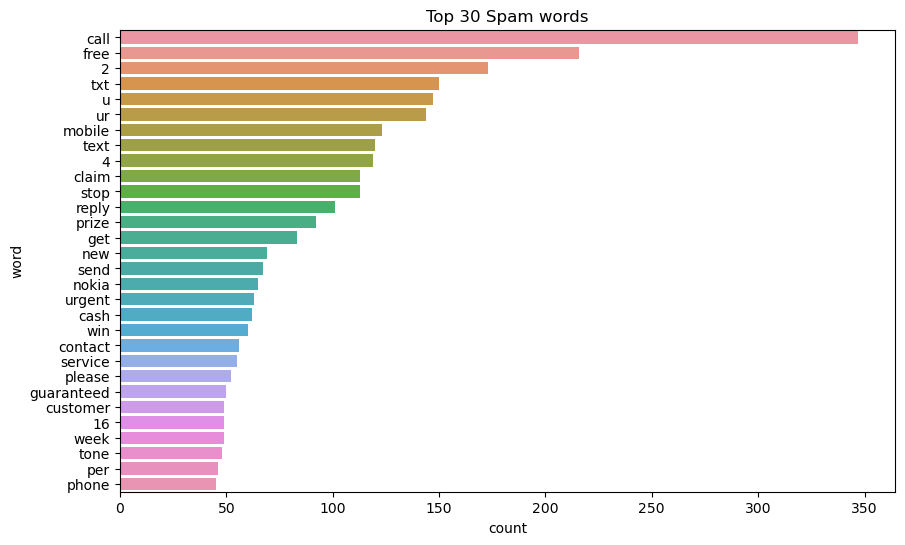

In [29]:
# visualizing the top 30 words list for spam messages
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='count', y='word', 
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='horizontal');

# BAG OF WORDS WITH COUNTVECTORIZER:
## Tokenization, Vectorization, TF-IDF, Bag of Words.

In [30]:
# applying the CountVectorizer from sklearn as BOW model
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['text'])

In [31]:
# Counting the unique wors in the vocabulary from the CountVectorizer
print('There are a total of '+ str(len(bow_transformer.vocabulary_))+ ' unique words in the vocabulary')

There are a total of 9431 unique words in the vocabulary


In [32]:
# Spam vectorization for the 8th sentence text
sample_spam = data['text'][8]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
  (0, 218)	1
  (0, 323)	1
  (0, 1906)	1
  (0, 2184)	2
  (0, 2245)	1
  (0, 2531)	1
  (0, 4194)	1
  (0, 4759)	1
  (0, 5707)	1
  (0, 6538)	1
  (0, 6775)	1
  (0, 6946)	1
  (0, 7209)	1
  (0, 8694)	1
  (0, 8698)	1
  (0, 9028)	1
  (0, 9418)	1


In [33]:
# Ham vectorization for the 5th sentence text
sample_ham = data['text'][5]
bow_sample_ham = bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
  (0, 520)	1
  (0, 1426)	1
  (0, 2123)	1
  (0, 2582)	1
  (0, 3547)	1
  (0, 3610)	1
  (0, 4071)	1
  (0, 4294)	1
  (0, 4954)	1
  (0, 5940)	1
  (0, 6730)	1
  (0, 7223)	1
  (0, 7768)	1
  (0, 7793)	1
  (0, 8080)	1
  (0, 8923)	1
  (0, 9093)	1
  (0, 9233)	1
  (0, 9377)	1


In [34]:
# applying bow transformer on the whole dataframe
bow_data = bow_transformer.transform(data['text'])

In [35]:
bow_data.shape

(5572, 9431)

In [36]:
bow_data.nnz

49772

In [37]:
# applying TF-IDF 
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_data)

In [38]:
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham) # on bow sample ham
print(tfidf_sample_ham)

  (0, 9377)	0.22748749429824783
  (0, 9233)	0.22154851236131606
  (0, 9093)	0.21942163362078237
  (0, 8923)	0.2396497914672141
  (0, 8080)	0.28975949487963343
  (0, 7793)	0.16633930994283222
  (0, 7768)	0.26470464317342374
  (0, 7223)	0.15884873743461816
  (0, 6730)	0.3082240585540464
  (0, 5940)	0.14543801327091235
  (0, 4954)	0.15184204724898473
  (0, 4294)	0.22154851236131606
  (0, 4071)	0.17770197700779822
  (0, 3610)	0.22380840508932395
  (0, 3547)	0.2552210905837249
  (0, 2582)	0.28316920684783675
  (0, 2123)	0.3228802072633085
  (0, 1426)	0.16754833603634428
  (0, 520)	0.19760594873226023


In [39]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam) # on bow sample spam
print(tfidf_sample_spam)

  (0, 9418)	0.2604683359422661
  (0, 9028)	0.23445094204464131
  (0, 8698)	0.24115248419490207
  (0, 8694)	0.22254833340975305
  (0, 7209)	0.2148462495005997
  (0, 6946)	0.2564029044370425
  (0, 6775)	0.2943229069695555
  (0, 6538)	0.178899142428953
  (0, 5707)	0.2148462495005997
  (0, 4759)	0.2943229069695555
  (0, 4194)	0.22555164191980467
  (0, 2531)	0.1915015107445745
  (0, 2245)	0.21371446699888028
  (0, 2184)	0.3406301232141347
  (0, 1906)	0.1153380143353214
  (0, 323)	0.2387711073538672
  (0, 218)	0.2943229069695555


In [40]:
data_tfidf = tfidf_transformer.transform(bow_data) # on entire bow sample data to a dataframe called data tfidf
print(data_tfidf)

  (0, 9107)	0.22954167967960823
  (0, 8870)	0.18978656059026508
  (0, 6376)	0.26034665364508613
  (0, 5624)	0.1806002024978732
  (0, 4803)	0.28119992157437884
  (0, 4644)	0.3328581634691494
  (0, 3845)	0.18526422487029678
  (0, 3805)	0.15637062087310696
  (0, 3748)	0.15133352947689135
  (0, 2988)	0.19730880900130401
  (0, 2463)	0.2577757346943601
  (0, 2178)	0.28119992157437884
  (0, 1840)	0.28119992157437884
  (0, 1838)	0.31774909628833775
  (0, 1375)	0.2531117123219365
  (0, 1142)	0.3328581634691494
  (1, 9003)	0.4229215011998556
  (1, 8534)	0.19658812296036549
  (1, 5972)	0.5355962344958958
  (1, 5940)	0.2688300250275592
  (1, 4842)	0.4000879300317037
  (1, 4612)	0.5131152435995512
  (2, 9059)	0.18807890505452227
  (2, 9017)	0.14698492929250848
  (2, 8518)	0.12458400696633347
  :	:
  (5568, 3767)	0.3115647413021785
  (5568, 3526)	0.48226234372873406
  (5568, 3151)	0.5533333135181996
  (5568, 1406)	0.3784412255140446
  (5569, 7919)	0.520467167163554
  (5569, 7544)	0.520467167163554
 

In [41]:
np.shape(data_tfidf) # shape of entire bow sample data

(5572, 9431)

# SPLITTING THE DATASET TO TRAINING AND TESTING SETS

In [42]:
# feautres are from the data tf-idf, target is the spam column of the data dataframe, train-test ratio is 70/30, random state is 42
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, data['spam'], test_size=0.3, random_state=42)

# MACHINE LEARNING CLASSIFICATION MODELS

## Naive Bayes

In [43]:
# creating matrices
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [44]:
# declaring the Naive Bayes model
spam_detect_model = MultinomialNB().fit(data_tfidf_train, label_train)

In [45]:
#Multinormal Naive Bayes model using only df-idf matrix
spam_detect_model = MultinomialNB().fit(data_tfidf_train, label_train)

In [46]:
# checking the performance using accuracy score metric
pred_test_MNB = spam_detect_model.predict(data_tfidf_test)
acc_MNB = accuracy_score(label_test, pred_test_MNB)
print('The Accuracy score of Multinominal Naive Bayes is '+str(acc_MNB))

The Accuracy score of Multinominal Naive Bayes is 0.9575358851674641


## kNN (k-nearest neighbors)

In [47]:
# checking 3 different knn models with 3 different k values
parameters_KNN = {'n_neighbors': (10,15,17), }

grid_KNN = GridSearchCV( KNeighborsClassifier(), parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(data_tfidf_train, label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': (10, 15, 17)}, verbose=1)

In [48]:
# checking which of the 3 k values is performing best by accuracy score metric

print('The Best Performing k-value is '+str(grid_KNN.best_params_))
print(str(grid_KNN.best_params_)+' is performing at an accuracy of '+str(grid_KNN.best_score_))

The Best Performing k-value is {'n_neighbors': 15}
{'n_neighbors': 15} is performing at an accuracy of 0.9335897435897437


## COMPARING THE RESULTS FROM THE CLASSIFICATION MODELS

In [49]:
# To compare the performance between the KNN and MNB models, Confusion matrix is used
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)
    #  
    plt.ylabel('true label')
    plt.xlabel('predicted label')

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1453
           1       1.00      0.68      0.81       219

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



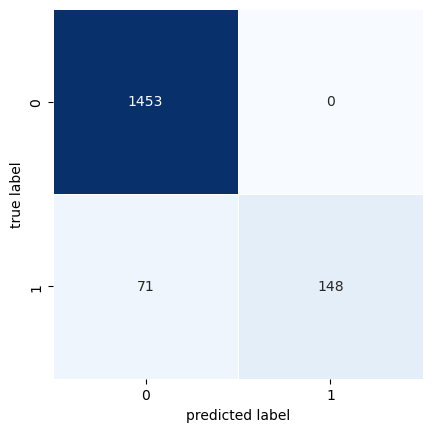

In [50]:
# applying it to the Multinominal Naive Bayes Model
plot_confusion_matrix(label_test, pred_test_MNB)
print(classification_report(label_test, pred_test_MNB))

## Intepreting the Classification Report for MultiNominal Naive Bayes Model:

* Accuracy:
The overall accuracy of the model is 0.96, indicating that it correctly classified 96% of all the instances in the test dataset.

* Precision: 
In class 0 (ham), the precision is 0.95, indicating that 95% of the instances predicted as ham were correct. In class 1 (spam), the precision is 1.00, meaning that all instances predicted as spam were correct.

* Recall: 
In class 0 (ham), the recall is 1.00, indicating that the model correctly identified all ham instances. However, in class 1 (spam), the recall is 0.68, implying that the model missed some instances of spam.

* F1-score: 
In class 0 (ham), the F1-score is 0.98, indicating a good balance between precision and recall. In class 1 (spam), the F1-score is 0.81, indicating that the model's performance is slightly lower due to the lower recall.

* Support: 
Support represents the number of instances of each class in the test dataset. In class 0 (ham), there are 1453 instances, while in class 1 (spam), there are 219 instances.

* Macro Avg: 
Macro average calculates the unweighted mean of precision, recall, and F1-score for both classes. In this case, the macro average precision, recall, and F1-score are 0.98, 0.84, and 0.89, respectively.

* Weighted Avg: 
Weighted average calculates the mean of precision, recall, and F1-score weighted by the support of each class. In this case, the weighted average precision, recall, and F1-score are all 0.96.

**Overall, the model performs well with high precision and accuracy for class 0 (non-spam). However, it has a lower recall and F1-score for class 1 (spam), indicating that it may miss some instances of spam.**

Fitting 5 folds for each of 3 candidates, totalling 15 fits
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1453
           1       0.99      0.52      0.68       219

    accuracy                           0.94      1672
   macro avg       0.96      0.76      0.82      1672
weighted avg       0.94      0.94      0.93      1672



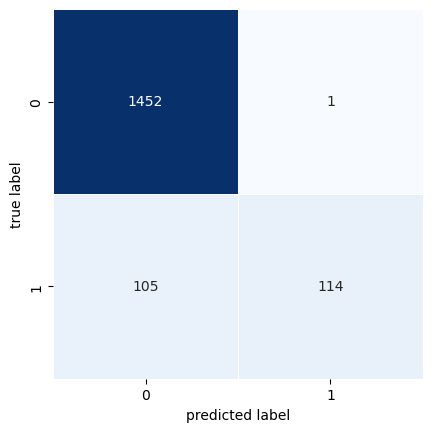

In [51]:
# applying the same to the K-Nearest Neighbors Model
KNN = grid_KNN.fit(data_tfidf_train, label_train)
pred_test_KNN = KNN.predict(data_tfidf_test)

plot_confusion_matrix(label_test, pred_test_KNN)
print(classification_report(label_test, pred_test_KNN))

## Intepreting the Classification Report for K-Nearest Neighbors:

* Accuracy:
The overall accuracy of the model is 0.94, indicating that it correctly classified 94% of all the instances in the test dataset.

* Precision: 
In class 0 (ham), the precision is 0.93, indicating that 93% of the instances predicted as ham were correct. In class 1 (spam), the precision is 0.99, meaning that 99% of all instances predicted as spam were correct.

* Recall: 
In class 0 (ham), the recall is 1.00, indicating that the model correctly identified all ham instances. However, in class 1 (spam), the recall is 0.52, implying that the model missed almost half of the instances of spam.

* F1-score: 
In class 0 (ham), the F1-score is 0.96, indicating a good balance between precision and recall. In class 1 (spam), the F1-score is 0.68, indicating that the model's performance is comparably lower due to the significantly lower recall.

* Support: 
Support represents the number of instances of each class in the test dataset. In class 0 (ham), there are 1453 instances, while in class 1 (spam), there are 219 instances.

* Macro Avg: 
Macro average calculates the unweighted mean of precision, recall, and F1-score for both classes. In this case, the macro average precision, recall, and F1-score are 0.96, 0.76, and 0.82, respectively.

* Weighted Avg: 
Weighted average calculates the mean of precision, recall, and F1-score weighted by the support of each class. In this case, the weighted average precision, recall, and F1-score are all 0.94.

**Overall, the model performs well with high precision and accuracy for class 0 (non-spam). However, it has a comparably lower recall and F1-score for class 1 (spam), indicating that it classifies some instances of spam poorly.**

# PROJECT SUMMARY

Overall, Multinominal Naive Bayes Model provides a strong fit classification for identifying and classifying spam messages from ham messages with a **0.96 accuracy** indicationg that 96% of instances in the entire test dataset were correctly classified. It also has a **precision** of **0.95 in class 0 (ham)** which indicates that 95% of the instances predicted as ham messages were correct; and **1.00 in class 1 (spam)** which indicates that all instances predicted as spam messages were correct.